##Spam detection using ML models
####By: Pintu, 181co139
####Date: 30/01/22

###Variables

In [ ]:
#x <- preprocessed
#x_train <- padded seq, type=list(list(int)). 
#X <- smoted, type=nd.array of int
#y <- labels, type=nd.array of int
#x1 <- final embedding, 3D data.
#x2 <- 2D reshaped data
#x_train & y_train <- training set.
#x_test & y_test <- testing set.


###mount Googledrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Read the dataset

In [ ]:
#Pintu 29/01/22
from sklearn import preprocessing
import pandas as pd

dataset=pd.read_csv('/content/drive/MyDrive/Colab datasets/Spam_dataset.csv', header=0, delimiter=",")

#remove the missing data.
dataset=dataset.dropna()
print("Head of the dataset =>\n",dataset.head()) #dataset.tail()

#Category -> Integer
#Ham = 0
#Spam = 1
# le = preprocessing.LabelEncoder()
# le.fit(dataset.Category)
# dataset['Category'] = le.transform(dataset.Category)

spam_cnt=0
for i in range(0, len(dataset['Category'])):
  if (dataset['Category'][i]=='ham'):
    dataset['Category'][i]="0"
  else:
    dataset['Category'][i]="1"
    spam_cnt+=1


print("\nTail of dataset after labelling =>\n",dataset.tail())
print("\nTotal spam texts are =>", spam_cnt," out of ",len(dataset))

Head of the dataset =>
   Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Tail of dataset after labelling =>
      Category                                            Message
5567        1  This is the 2nd time we have tried 2 contact u...
5568        0               Will ü b going to esplanade fr home?
5569        0  Pity, * was in mood for that. So...any other s...
5570        0  The guy did some bitching but I acted like i'd...
5571        0                         Rofl. Its true to its name

Total spam texts are => 747  out of  5572


###PreProcessing


In [ ]:
#Pintu 29/01/22
#Preprocessing of the dataset step

#PUNCTUATION 
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#TOLOWER
#converting text into lower format.
def to_lower(text):
    lowered_text=text.lower()
    return lowered_text

#TOKENIZATION
#defining function for tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

#REMOVE STOPWORDS
#importing nlp library
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
print("\nFew english stopwords are: ",stopwords[0:10])

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#STEMMING
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

#LEMMATIZATION
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemmed_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemmed_text


##PRE-PROCESSING##
def text_preprocessing(text):
    punctuation_free=remove_punctuation(text)
    lower_text=to_lower(punctuation_free)
    tokenized_text=tokenization(lower_text)
    stopwords_free=remove_stopwords(tokenized_text)
    stemmed_text=stemming(stopwords_free)
    lemmatized_text=lemmatizer(stemmed_text)
    return [punctuation_free,lower_text,tokenized_text,stopwords_free,stemmed_text,lemmatized_text]

#Apply pre-processing function.
for i in range(0,len(dataset['Message'])):
  dataset['Message'][i]=text_preprocessing(dataset['Message'][i])[5]

#Many other steps include: URL removal, HTML tags removal, Rare words removal, Frequent words removal, Spelling checking, and many more.
#But we are not going for further pre-processing cause we need to detect spams and spam contains URL.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

Few english stopwords are:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


###Verify pre-processing

In [ ]:
#Pintu 29/01/22
#verify.

text="Let's See; CONNECTION Misunderstanding swimming; ASSure the Authentication: of Working of tExt Pre-processing"
[punctuation_free,lower_text,tokenized_text,stopwords_free,stemmed_text,lemmatized_text]=text_preprocessing(text)
print("Remove punctuation=> ",punctuation_free)
print("Lowered text      => ",lower_text)
print("Tokens separated  => ",tokenized_text)
print("Remove stopwords  => ",stopwords_free)
print("Stemming          => ",stemmed_text)
print("Lemmatizer        => ",lemmatized_text)

print("\nVerify the proper preprocessing:\n",dataset['Message'][0:7])

#success msg.
print("\nAll texts have been preprocessed successfully!!")

Remove punctuation=>  Lets See CONNECTION Misunderstanding swimming ASSure the Authentication of Working of tExt Preprocessing
Lowered text      =>  lets see connection misunderstanding swimming assure the authentication of working of text preprocessing
Tokens separated  =>  ['lets', 'see', 'connection', 'misunderstanding', 'swimming', 'assure', 'the', 'authentication', 'of', 'working', 'of', 'text', 'preprocessing']
Remove stopwords  =>  ['lets', 'see', 'connection', 'misunderstanding', 'swimming', 'assure', 'authentication', 'working', 'text', 'preprocessing']
Stemming          =>  ['let', 'see', 'connect', 'misunderstand', 'swim', 'assur', 'authent', 'work', 'text', 'preprocess']
Lemmatizer        =>  ['let', 'see', 'connect', 'misunderstand', 'swim', 'assur', 'authent', 'work', 'text', 'preprocess']

Verify the proper preprocessing:
 0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, 2, wkli, comp, win, f

###Create Vocabulary

In [ ]:
#pintu 30/01/22

from tensorflow.keras.preprocessing.text import Tokenizer                    
from tensorflow.keras.preprocessing.sequence import pad_sequences

x=dataset['Message']
y=dataset['Category']

#create the dict.
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(x)

#number of unique words in dict.
print("Number of unique words in dictionary=",len(tokenizer.word_index))

#replace words with their index in vocab.
x_train = tokenizer.texts_to_sequences(x)
print("Type of x_train(3D) obviously int =",type(x_train),type(x_train[0]),type(x_train[0][0]))

# Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1  

#size of random text in training set.
print("Length of random text=")
for i in range(10):
  print("Length of ",i+1," text is => ",len(x_train[i]))

#Maximum length of each text
maxlen = 30

#pad the short text and truncate longer texts.
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)

Number of unique words in dictionary= 8145
Type of x_train(3D) obviously int = <class 'list'> <class 'list'> <class 'int'>
Length of random text=
Length of  1  text is =>  16
Length of  2  text is =>  6
Length of  3  text is =>  23
Length of  4  text is =>  9
Length of  5  text is =>  8
Length of  6  text is =>  19
Length of  7  text is =>  8
Length of  8  text is =>  16
Length of  9  text is =>  18
Length of  10  text is =>  18


###Confirm that text is converted into vector

In [ ]:
#pintu 30/01/22
print("First tweet=> ",x[0])
print("Text to seq=> ",x_train[0])
print("\nVerification successful!")

First tweet=>  ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']
Text to seq=>  [   5 3746  289  600  559 1075   44   69  263 1076   97 2494 1077   16
 3747   73    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]

Verification successful!


###SMOTE: Synthetic Minority Oversampling TEchnique

In [ ]:
#Pintu 30/01/22

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#print(imblearn.__version__)
from collections import Counter
import numpy as np

msg,y= x_train, dataset['Category'].to_numpy()
print("Type of message column and class label => ",type(msg),type(y))
count = Counter(y)
print("\nInitial Count of each class is =>",count)

# over = SMOTE(sampling_strategy=0.2) #sampling_strategy argument tells that minority = 10% of majority.
# X, y = over.fit_resample(X, y)
# under = RandomUnderSampler(sampling_strategy=0.5) #sampling_strategy argument tells that majority = 1/0.5 of minority.
# X, y = under.fit_resample(X, y)

#Using Pipeline instead of doing separately.
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)
steps_in_order = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps_in_order)

# transform the dataset
X, y = pipeline.fit_resample(msg, y)
# summarize the new class distribution
counter = Counter(y)
print("\nNew count after SMOTE of both class =>",counter)
print("\nSize of X and y => ",len(X),len(y))

Type of message column and class label =>  <class 'numpy.ndarray'> <class 'numpy.ndarray'>

Initial Count of each class is => Counter({'0': 4825, '1': 747})

New count after SMOTE of both class => Counter({'0': 1930, '1': 965})

Size of X and y =>  2895 2895


###Download zip glove file

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
#50d and 100d files are in drive.😁

--2022-02-06 17:29:22--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-02-06 17:29:22--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-02-06 17:29:23--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

###Unzip glove file

In [ ]:
# !unzip glove*.zip #with above loc.

#!unzip /content/drive/MyDrive/Project_Fake_News_Detection_DL/03_glove_files/glove.6B.50d.zip

Archive:  /content/drive/MyDrive/Project_Fake_News_Detection_DL/03_glove_files/glove.6B.50d.zip
  inflating: glove.6B.50d.txt        


###Create embeddings of vocab.

In [ ]:
#Pintu 30/01/22
import numpy as np

#vocab: 'the': 1, mapping of words with integers in seq. 1,2,3..
#embedding: 1->dense vector

def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))
  
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix_vocab

#matrix for vocab: word_index #/content/glove.6B.50d.txt
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab('/content/glove.6B.50d.txt',tokenizer.word_index,embedding_dim)


###Verify the vocabulary and embedding matrix.

In [ ]:
#Pintu 30/01/22

print("Type of vocabulary => ",type(tokenizer.word_index))
print("\nVocabulary glance => ",)
stop=0

#see the dict.
for word,index in tokenizer.word_index.items():
  stop+=1
  if(stop==10):
    break
  print(index," => ",word)
  
#dense vector.
print("\nDense vector of first word in dict => \n",embedding_matrix_vocab[1])


Type of vocabulary =>  <class 'dict'>

Vocabulary glance => 
1  =>  u
2  =>  call
3  =>  2
4  =>  im
5  =>  go
6  =>  get
7  =>  ur
8  =>  come
9  =>  4

Dense vector of first word in dict => 
 [-0.25676     0.8549      1.10029995  0.95362997  0.36585    -1.30289996
  1.07539999 -0.18460999 -0.67673999  0.37637001 -0.029637    0.51697999
 -0.19248    -0.41863    -0.71144003  0.12564    -0.42965001  0.61456001
  0.41819     0.27605999 -0.48635    -0.32585001  0.67747998  0.15916
  0.35051    -0.29392999 -0.80439001 -0.15939     0.012475   -0.58403999
  2.13529992 -0.1547     -0.57389998  1.45220006  0.6124     -0.68752003
  1.28390002 -0.54631001 -0.35736999  0.57323003  0.35460001 -0.37465
 -0.74628001 -0.074561   -0.48471001  0.067343   -0.039338   -0.22177
  0.099708    0.55553001]


###Create embedding for all tweet texts.

In [ ]:
#Pintu 30/01/22

import numpy as np

#tweet_text: [23, 0, 34, ..., 35] tweet converted into seq.
#goal: [[dense vector for 23], ..., [dense vecor for 35]]
def embedded_tweet_text(embedding_matrix_vocab, tweet_text):
    matrix_size = len(tweet_text)   
    
    tweet_text_matrix = np.zeros((matrix_size, embedding_dim))
    
    #traverse pad_seq of each tweet text
    for i in range(0,matrix_size):
      index=tweet_text[i]
      if(index==0):
        continue
      else:
        tweet_text_matrix[i]=embedding_matrix_vocab[index]
    return tweet_text_matrix

#define zero matrix.
n=len(X)
x1=np.zeros((n, 30, 50))

#populate matrix.
for i in range(0,n):
  x1[i]=embedded_tweet_text(embedding_matrix_vocab, X[i])

#ML model don't accept input in 3D shape
#so reshape 3D into 2D: 1D array per tweet.
x2=x1.reshape(len(X),-1)
print("Shape of x2 => ",x2.shape)

Shape of x2 =>  (2895, 1500)


###Verifying whole embedding.

In [ ]:
#x <- preprocessed
#x_train <- padded seq
#X <- smoted
#x1 <- final embedding, 3D data.
#x2 <- 2D reshaped data

print("First tweet as text =>\n",dataset['Message'][1])
print("First tweet: text->seq =>\n",x_train[1])
print("Dense vector for 1st word of above tweet =>\n",embedding_matrix_vocab[22])
print("First tweet -> 2D matrix of dense vectors =>\n",x1[1])

First tweet as text =>
 ['ok', 'lar', 'joke', 'wif', 'u', 'oni']
First tweet: text->seq =>
 [  11  249  560  366    1 1596    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
Dense vector for 1st word of above tweet =>
 [-3.55859995e-01  5.21300018e-01 -6.10700011e-01 -3.01310003e-01
  9.48620021e-01 -3.15389991e-01 -5.98309994e-01  1.21880002e-01
 -3.19430009e-02  5.56949973e-01 -1.06210001e-01  6.33989990e-01
 -4.73399997e-01 -7.58949965e-02  3.82470012e-01  8.15690011e-02
  8.22139978e-01  2.22200006e-01 -8.37639999e-03 -7.66200006e-01
 -5.62529981e-01  6.17590010e-01  2.02920005e-01 -4.85979989e-02
  8.78149986e-01 -1.65489995e+00 -7.74179995e-01  1.54349998e-01
  9.48230028e-01 -3.95200014e-01  3.73020005e+00  8.28549981e-01
 -1.41039997e-01  1.63950007e-02  2.11150005e-01 -3.60849984e-02
 -1.55870005e-01  8.65830004e-01  2.63090014e-01 -7.10150003e-01
 -3.67700011e-02  1.82819995e-03 -1.77039996e-01  2.7031999

#Build Models: k-fold cross validation using accuracy as metric.

###ML models

In [ ]:
#libraries.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# get a list of models to evaluate
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(SGDClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(RandomForestClassifier())
	models.append(GradientBoostingClassifier())
	return models

models = get_models()

In [ ]:
#Pintu 30/01/22

# X and y are being SMOTE

#define folds
folds = range(3,7)

# evaluate each k value for a model
def evaluate_model(model):
  for k in folds:
    cross_validation = KFold(n_splits=k, shuffle=True, random_state=1)
    scores = cross_val_score(model, x2, y, scoring='accuracy', cv=cross_validation, n_jobs=-1)
    print("Average of the accuracy for ",k,"folds => ",mean(scores))

# evaluate each model
for m in models:
  model=m
  print("\nSummary of model:",model)
  evaluate_model(model)


Summary of model: LogisticRegression()
Average of the accuracy for  3 folds =>  0.8756476683937824
Average of the accuracy for  4 folds =>  0.8804785348035732
Average of the accuracy for  5 folds =>  0.8766839378238341
Average of the accuracy for  6 folds =>  0.8766734247971844

Summary of model: SGDClassifier()
Average of the accuracy for  3 folds =>  0.8687392055267703
Average of the accuracy for  4 folds =>  0.8704632898527468
Average of the accuracy for  5 folds =>  0.8614853195164077
Average of the accuracy for  6 folds =>  0.8673487796706271

Summary of model: KNeighborsClassifier()
Average of the accuracy for  3 folds =>  0.7395509499136442
Average of the accuracy for  4 folds =>  0.7474964275616485
Average of the accuracy for  5 folds =>  0.7492227979274612
Average of the accuracy for  6 folds =>  0.7530161021050431

Summary of model: DecisionTreeClassifier()
Average of the accuracy for  3 folds =>  0.816580310880829
Average of the accuracy for  4 folds =>  0.8131194455270014


#Using train-test spliting

In [ ]:
#Pintu 01/02/22
#x <- preprocessed
#x_train <- padded seq
#X <- smoted
#y <- labels 
#x1 <- final embedding, 3D data.
#x2 <- 2D reshaped data
#x_train & y_train <- training set.
#x_test & y_test <- testing set.

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#function in above cell.
models = get_models()

#split dataset into train and test data
print("Size of x2(message) and y(class) =>",len(x2), len(y))
x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=1, stratify=y)

# # evaluate each model
trained_model=list()
for m in models:
  model=m
  trained_model.append(model.fit(x_train,y_train))
  y_pred=model.predict(x_test)
  acc=model.score(x_test, y_test)
  cm=confusion_matrix(y_test, y_pred)
  cr=classification_report(y_test, y_pred)
  print("Accuracy of ",model," => {0:.2f} %".format(acc*100))
  print("Confusion matrix for ",model," =>\n",cm)
  print("Classification report for ",model," =>\n",cr)

Size of x2(message) and y(class) => 2895 2895


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of  LogisticRegression()  => 87.91 %
Confusion matrix for  LogisticRegression()  =>
 [[355  31]
 [ 39 154]]
Classification report for  LogisticRegression()  =>
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       386
           1       0.83      0.80      0.81       193

    accuracy                           0.88       579
   macro avg       0.87      0.86      0.86       579
weighted avg       0.88      0.88      0.88       579

Accuracy of  SGDClassifier()  => 84.80 %
Confusion matrix for  SGDClassifier()  =>
 [[340  46]
 [ 42 151]]
Classification report for  SGDClassifier()  =>
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       386
           1       0.77      0.78      0.77       193

    accuracy                           0.85       579
   macro avg       0.83      0.83      0.83       579
weighted avg       0.85      0.85      0.85       579

Accuracy of  KNeighbo

In [ ]:
print("ML Model part is finished!")

ML Model part is finished!


###TEST on random tweets.

In [ ]:
#Pintu, 01/02/2022
import numpy as np

text='you win a lottery of 2 lakh. click on below link to collect the reward. offer limited for 2 hours only'

#pre-processing returns all outputs, take final output only.
_,_,_,_,_,clean_text=text_preprocessing(text)
print("Clean text => ",clean_text)

#text to sequence: Hot encoding 
#below functions take 2D input: multiple rows of tweets.
#so, pass 1D input as 2D input, by closing in []
seq_text = tokenizer.texts_to_sequences([clean_text])
seq_pad = pad_sequences(seq_text, padding='post', maxlen=30)
print("Text to seq => ",seq_text)
print("Pad  seq => ",seq_pad)

#below function takes 1D input,
#so, convert 2D input into 1D, by indexing as [0]
embedded_text=embedded_tweet_text(embedding_matrix_vocab, seq_pad[0])

#for each text, it needs 1D array, so 
#convert 2D matrix into 1D using flatten().
final=embedded_text.flatten()

#predict using all trained models.
for i in range(len(trained_model)):
  print(f"Model=>{trained_model[i]}")
  pred_class=trained_model[i].predict([final])
  print(f"Ans : {pred_class}")   ## Note the type(pred_class[0]) is 'str'
  if(pred_class=='1'):
    print("Class of given text is=> Spam",)
  else:
    print("Class of given text is=> Non-Spam",)
  print('\n\n')

Clean text =>  ['win', 'lotteri', '2', 'lakh', 'click', 'link', 'collect', 'reward', 'offer', 'limit', '2', 'hour']
Text to seq =>  [[105, 3, 4213, 1081, 781, 157, 725, 199, 1579, 3, 183]]
Pad  seq =>  [[ 105    3 4213 1081  781  157  725  199 1579    3  183    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]
Model=>LogisticRegression()
Ans : ['1']
Class of given text is=> Spam



Model=>SGDClassifier()
Ans : ['1']
Class of given text is=> Spam



Model=>KNeighborsClassifier()
Ans : ['0']
Class of given text is=> Non-Spam



Model=>DecisionTreeClassifier()
Ans : ['0']
Class of given text is=> Non-Spam



Model=>SVC()
Ans : ['1']
Class of given text is=> Spam



Model=>GaussianNB()
Ans : ['1']
Class of given text is=> Spam



Model=>RandomForestClassifier()
Ans : ['1']
Class of given text is=> Spam



Model=>GradientBoostingClassifier()
Ans : ['1']
Class of given text is=> Spam





#Spam detection using DL models

In [ ]:
X.shape
print(type(X))
x3=X
yy = y.astype(float)
x3.shape==X.shape
# xx = X.astype(str)
# print(type(xx))
# xx.shape

<class 'numpy.ndarray'>


True

###Hybrid CNN-RNN model

In [ ]:
#pintu, 05/02/2022
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

embedding_dim = 50 #size of dense vector.
maxlen=30 #size of tweet after padding.
vocab_size=len(tokenizer.word_index) + 1 #size of vocabulary.

# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix_vocab], input_length=maxlen, trainable=True))
# model.add(layers.Conv1D(128, 5, activation='relu'))
# model.add(layers.MaxPooling1D(2))
# model.add(layers.LSTM(32))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix_vocab], input_length=maxlen, trainable=True))
# model.add(layers.Conv1D(256, 5, activation='relu'))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.LSTM(64))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix_vocab], input_length=maxlen, trainable=True))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

###Run-1

In [ ]:
#pintu, 05/02/2022

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#split dataset into train and test data
####  splitting
# Run-1, acc=91%
# x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state=1, stratify=y)
# history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
# model.summary()

# Run-2, acc=93%
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state=1, stratify=y)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=16)
model.summary()

# Run-3, acc=93%
# x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state=1, stratify=y)
# history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), batch_size=32)
# model.summary()

Epoch 1/10
127/127 [==============================] - 5s 17ms/step - loss: 0.3265 - accuracy: 0.8776 - val_loss: 0.2954 - val_accuracy: 0.8769
Epoch 2/10
127/127 [==============================] - 2s 13ms/step - loss: 0.2015 - accuracy: 0.9284 - val_loss: 0.2746 - val_accuracy: 0.8918
Epoch 3/10
127/127 [==============================] - 2s 14ms/step - loss: 0.1422 - accuracy: 0.9526 - val_loss: 0.1726 - val_accuracy: 0.9367
Epoch 4/10
127/127 [==============================] - 3s 25ms/step - loss: 0.0957 - accuracy: 0.9704 - val_loss: 0.1769 - val_accuracy: 0.9367
Epoch 5/10
127/127 [==============================] - 3s 24ms/step - loss: 0.0574 - accuracy: 0.9842 - val_loss: 0.2329 - val_accuracy: 0.9379
Epoch 6/10
127/127 [==============================] - 3s 25ms/step - loss: 0.0391 - accuracy: 0.9911 - val_loss: 0.2016 - val_accuracy: 0.9425
Epoch 7/10
127/127 [==============================] - 3s 24ms/step - loss: 0.0335 - accuracy: 0.9921 - val_loss: 0.2086 - val_accuracy: 0.9436

In [ ]:
#pintu, 05/02/2022

loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))#overfitting.
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))#actual accuracy

Training Accuracy: 1.0000
Testing Accuracy:  0.9298


In [ ]:
#pintu, 05/02/2022

from math import floor
from sklearn.metrics import classification_report, confusion_matrix
def performance(x_test, y_test):
  y_pred=model.predict(x_test)
  # print(y_pred[0])
  y_pred=[1 if x>=0.5 else 0 for x in y_pred]
  # print(y_pred[0])
  cm=confusion_matrix(y_test, y_pred)
  cr=classification_report(y_test, y_pred)

  print("Confusion matrix=\n",cm)
  print("Classification report=\n",cr)

#call the performance measure function
performance(x_test, y_test)

Confusion matrix=
 [[557  22]
 [ 32 258]]
Classification report=
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       579
         1.0       0.92      0.89      0.91       290

    accuracy                           0.94       869
   macro avg       0.93      0.93      0.93       869
weighted avg       0.94      0.94      0.94       869



###Graph plotting

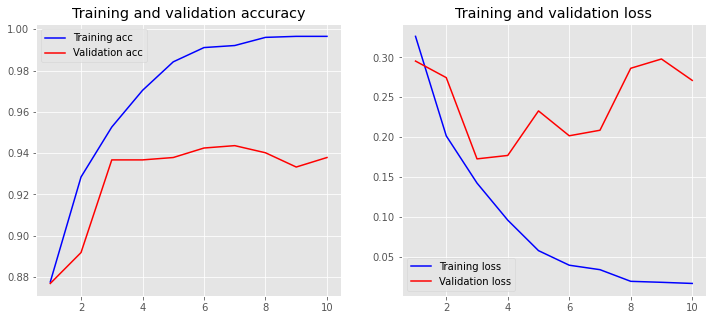

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


#call the function using history
plot_history(history)